# Introduction to Econometrics - Homework 1
## Group J :
### Ying Ding - B00780777
### Xinyu Hu - B00782286
### Meduri Venkata Shivaditya - B00780791
### Xinran Yao - B00782287

In [1]:
# Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import io
from scipy import stats
import requests
from statsmodels.stats.outliers_influence import summary_table
from scipy.stats import norm
from scipy.stats import norm
from numpy.linalg import inv
from scipy.optimize import minimize
from scipy.stats import pearsonr

# Q 1) Summary Statistics

### Data : Monthly excess returns from 384 financial assets

### Does higher expected returns imply higher risks?

In [2]:
#Importing dataset
data_1 = pd.read_csv("https://raw.githubusercontent.com/adufays/GDP_expectancy/main/APM_Returns.csv")
#Drop unnecessary columns : Include assets only from financial asset MMM
data_1.drop(['Unnamed: 0', 'Date', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA...6'], axis = 1, inplace=True)
#View the format of the dataset
data_1.head()

,MMM,ABT,ATVI,ADBE,AES,AET,AMG,AFL,A,APD,...,HCN,WDC,WY,WHR,WMB,XEL,XRX,XLNX,XL,YUM
0,-1.20,-7.37,-5.35,-16.43,10.11,-4.57,-6.19,-3.34,-8.48,-10.12,...,4.47,20.22,-18.30,-6.17,22.37,0.91,-14.11,-2.55,-12.09,-23.69
1,-6.24,0.91,-19.23,84.81,4.17,-23.20,13.11,-16.26,56.51,-13.51,...,-3.92,-5.69,-11.00,-7.19,9.42,-9.20,3.76,73.89,-11.31,-7.42
2,-0.04,6.16,-5.40,8.66,-6.51,34.48,20.36,24.15,-0.35,9.97,...,-10.51,64.81,10.61,7.47,4.61,12.70,19.07,3.37,36.47,16.20
3,-2.65,8.78,-48.65,8.19,13.75,3.82,-15.99,6.67,-15.24,8.77,...,13.38,-8.02,-6.82,10.63,-15.11,9.29,1.46,-12.01,-14.46,8.59
4,-1.51,5.35,-1.50,-7.43,-3.49,14.83,-17.01,5.39,-17.43,10.97,...,0.28,-32.32,-7.53,-13.46,10.33,0.93,1.86,3.42,24.43,-13.97


## Q 1.1) Making a scatter plot : avg returns vs standard deviations for 384 financial assets

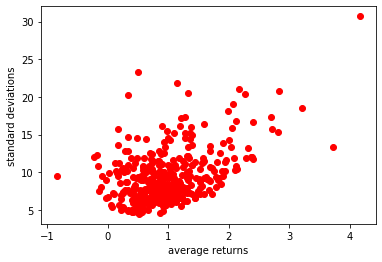

In [3]:
# Calculating the average returns and standard deviations of 384 financial assets
ave = data_1.mean() #Average returns
std = data_1.std() #Standard deviation
# Plotting the data in a scatter plot
plt.scatter(ave, std, c='r')
plt.xlabel("average returns")
plt.ylabel("standard deviations")
plt.show()

## Q 1.2) Estimating a linear regression model using OLS 

### Linear regression model : 
\begin{equation} 
std_i = \beta_1 + \beta_2ave_i + \epsilon_i
\end{equation}

#### Estimate $\beta_1$ and $\beta_2$ 

In [4]:
# Using a custom built model
def OLS(x, y):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    beta_2 = np.sum((x-x_bar)*(y-y_bar))/np.sum((x-x_bar)**2)
    beta_1 = y_bar - beta_2*x_bar
    return beta_1, beta_2
beta1, beta2 = OLS(ave, std)
print("Beta 1 : ", beta1, "Beta 2 : ", beta2)

Beta 1 :  6.827535569653793 Beta 2 :  2.655569979779613


In [5]:
# Using an inbuilt model
# An intercept is not included by default and should be added to use sm.OLS
ave_m = sm.add_constant(ave)
model_OLS_1=sm.OLS(std,ave_m).fit()
print(model_OLS_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 28 May 2021   Prob (F-statistic):           2.47e-22
Time:                        17:35:30   Log-Likelihood:                -975.32
No. Observations:                 384   AIC:                             1955.
Df Residuals:                     382   BIC:                             1963.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8275      0.293     23.303      0.0

## Q 1.3) Interpretation of $\beta_2$

### Using OLS estimator $\beta_1 = 6.82$ and $\beta_2 = 2.65$

### The above regression model is level-level.

### so, 1 unit increase in average returns adds 2.65 to the standard deviation

## Q 1.4) Plotting average returns and standard deviations of 384 financial assets along with the values generated by the estimated linear regression model

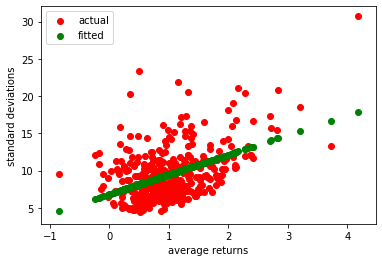

In [6]:
#The fit function will generate the fitted values of the regression model
def fit(beta1, beta2, x):
  return beta2*x+beta1 
fitted_values = fit(beta1, beta2, ave)
plt.scatter(ave, std, c='r', label = 'actual')
plt.scatter(ave, fitted_values, c='g', label = 'fitted')
plt.xlabel('average returns')
plt.ylabel('standard deviations')
plt.legend()
plt.show()

## Q 1.5) Mathematical formula for estimators $\beta_1$ and $\beta_2$

\begin{equation}
    \beta_2 = \frac {\sum_{t=1}^T (ave_t - \overline{ave})(std_t - \overline{std})} {\sum_{t=1}^{T} (ave_t - \overline{ave})^2}
\end{equation}

\begin{equation}
    \beta_1 = \overline{std} - \beta_2\overline{ave}
\end{equation}

## Q 1.6) Testing the statistical significance of $\beta_2$

### Two sided statistical test: H0 : $\beta_2 = 0$ vs H1 : ${\beta_2}\neq{0}$

### Computing the z-statistic : 
\begin{equation}
    Z_{\beta_2} = \frac{\hat{\beta_2} - \beta_2} {\sqrt{\frac{\sigma^2}{\sum_{t=1}^{T}(ave_t - \overline{ave})^2}}}
\end{equation}

### 95% significance test implies $Z_{crit} = 1.96$

### Testing if $|Z_{\beta_2}| > Z_{crit}$

In [7]:
# Unbiased estimator of the variance of the error
def sigma2(beta1, beta2, y, x):
  er = y - fit(beta1, beta2, x)
  verr = sum(er**2)/(len(er) - 2)
  return verr

# Variance of the OLS estimator
def var_OLS(x, sigma2):
  varOLS = sigma2/sum((x-x.mean())**2)
  return varOLS

s2 = sigma2(beta1, beta2, std, ave)
varOLS = var_OLS(ave, s2)
beta_true = 0
z_beta2 = (beta2 - beta_true) / math.sqrt(varOLS)
z95 = 1.96
print("Z score of the OLS estimator is :", z_beta2)
print("Reject Null hypothesis? : ", abs(z_beta2) > z95 )

Z score of the OLS estimator is : 10.360998618447704
Reject Null hypothesis? :  True


## After statistical test : $Z_{\beta_2} = 10.36$ 

### Given  $Z_{crit} = 1.96$

### Therefore $|Z_{\beta_2}| > Z_{crit}$

### Hence we reject the null hypothesis

### Interpretation : Through hypothesis testing we can say that average returns do have an effect on the risk of the financial asset

# Q 2) Linear regression: Mathematical framework

### Relation between life expectancy and the Gross Domestic Product (GDP) per capita (in thousands of dollars)

In [8]:
#Importing dataset
url = "https://raw.githubusercontent.com/adufays/GDP_expectancy/main/life_gdp.csv"
df = pd.read_csv(url,sep=",")
#Remove Space in column name
df.rename(columns={'Life exp.':'Life_exp', 'GDPpcap':'GDP_pcap'},inplace = True)
#View the dataset
df.head()

,Life_exp,GDP_pcap
1,64.047,1.758466
2,78.495,11.803284
3,76.293,13.876295
4,61.809,6.044972
5,76.519,22.855748


## Q 2.1) Making a scatter plot : GDP vs life expectancy, and add the fitted values (level-level)

       beta1     beta2
0  67.513673  0.249325


Text(0, 0.5, 'Life Expectancy')

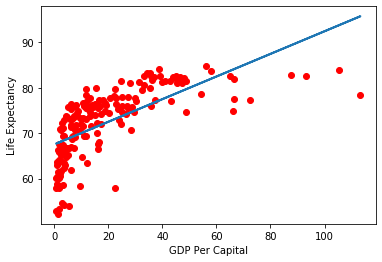

In [9]:
#Plot
x = df.GDP_pcap
y = df.Life_exp
#Calculate beta
x_bar = np.mean(x)
y_bar = np.mean(y)
beta2 = np.dot(x-x_bar,y-y_bar)/np.dot(x-x_bar,x-x_bar)
beta1 = y_bar - beta2 * x_bar
df_beta=pd.DataFrame(np.array((beta1,beta2),ndmin=2),columns=["beta1","beta2"])
print(df_beta)
#Plot
plt.scatter(x, y, c='r')
plt.plot(x,beta1 + beta2*x,linewidth=2)
plt.xlabel('GDP Per Capital')
plt.ylabel('Life Expectancy')

## Q 2.1) Making a scatter plot : GDP vs life expectancy, and add the fitted values (level-ln)

       beta1     beta2
0  59.659329  5.333648


Text(0, 0.5, 'Life Expectancy')

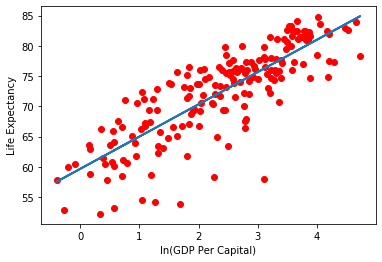

In [10]:
lnx=np.log(x)
lnx_bar = np.mean(lnx)
y_bar = np.mean(y)
beta2 = np.dot(lnx-lnx_bar,y-y_bar)/np.dot(lnx-lnx_bar,lnx-lnx_bar)
beta1 = y_bar - beta2 * lnx_bar
df_beta=pd.DataFrame(np.array((beta1,beta2),ndmin=2),columns=["beta1","beta2"])
print(df_beta)

#Plot
plt.scatter(lnx, y, c='r')
plt.plot(lnx,beta1 + beta2*lnx,linewidth=2)
plt.xlabel('ln(GDP Per Capital)')
plt.ylabel('Life Expectancy')

## Q 2.3) Estimate the coefficient of determination of the two regressions. Compare.

### a) for levle-level regression 
\begin{equation}
   y_t = \beta_1 + \beta_2x_t + \epsilon_t
\end{equation}
the coefficient of determination is as follow:

In [11]:
#Add an intercept
x_m = sm.add_constant(x)
res = sm.OLS(y,x_m).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Life_exp   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     142.4
Date:                Fri, 28 May 2021   Prob (F-statistic):           1.47e-24
Time:                        17:35:31   Log-Likelihood:                -574.97
No. Observations:                 182   AIC:                             1154.
Df Residuals:                     180   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.5137      0.585    115.478      0.0

### b) for levle-log regression 
\begin{equation}
   y_t = \beta_1 + \beta_2lnx_t + \epsilon_t
\end{equation}
the coefficient of determination is as follow:

In [12]:
lnx_m = sm.add_constant(lnx)
lnres = sm.OLS(y,lnx_m).fit()
print(lnres.summary())

                            OLS Regression Results                            
Dep. Variable:               Life_exp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     382.8
Date:                Fri, 28 May 2021   Prob (F-statistic):           2.00e-46
Time:                        17:35:31   Log-Likelihood:                -524.28
No. Observations:                 182   AIC:                             1053.
Df Residuals:                     180   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.6593      0.722     82.628      0.0

### Interpretation: 
The coefficient of determination for the regressions above are 0.442 and 0.680 respectively.

for $y_t = \beta_1 + \beta_2x_t + \epsilon_t$, approximately 44.2% of the variation of Life Expectancy could be explained by GDP per capital

for $y_t = \beta_1 + \beta_2lnx_t + \epsilon_t$, 68% of the variation of Life Expectancy could be explained by GDP per capital.
### Conclusion:
the second regression model fits better

 ## Q 2.4) Compute the empirical correlation

In [13]:
corr = x.corr(y)
print(corr**2)

0.4417005505296341


In [14]:
lncorr = lnx.corr(y)
print(lncorr**2)

0.6801556970979602


### Conclusion: 
the squared empirical correlation equal to the coefficient of determination respectively.
$$R^2 = \rho_{\hat{y}{y}}^2$$

# Q3 Generating spurious correlation

In [15]:
#import data
df_3 = pd.read_csv('https://raw.githubusercontent.com/adufays/GDP_expectancy/main/Appl_Russell.csv',index_col = False)
df_3 = df_3.drop('Unnamed: 0', axis = 1)

#quick exploration of data
print(df_3.shape)
df_3.head(5)

(262, 3)


,Date,Apple returns,Russell returns
0,2016-04-25,-11.989084,-1.260337
1,2016-05-02,-1.094085,-0.561795
2,2016-05-09,-1.794334,-0.581591
3,2016-05-16,5.061906,0.377336
4,2016-05-23,5.247411,2.334956


## Q 3.1) Generate 1000 explanatory variables from Normal Distribution

In [16]:
#compute the sample size of apple asset returns
df_3.shape

(262, 3)

In [17]:
#generate explanatory variables
df_explanVar = pd.DataFrame()
for i in range(1000):
    df_explanVar[i] = norm.rvs(size=262, loc=0, scale=1)

In [18]:
y = df_3['Apple returns']
test_statistics = []
x_for_plot = []

#estimate linear regression:
for i in range(1000):
    x_model = df_explanVar.iloc[:,i]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_model, y)
    x_for_plot.append(i)
    test_statistics.append(slope/std_err)

#where intercept is beta1 and slope is beta2


1000 explanatory variables of size 262 are created

## Q3.2) Make a plot of these statistics.

In [19]:
y = df_3['Apple returns']
test_statistics = []
#slope_1 = []
x_for_plot = []

for i in range(1000):
    x_model = df_explanVar.iloc[:,i]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_model, y)
    x_for_plot.append(i)
    test_statistics.append(slope/std_err)
    #np.append(slope_1,slope)

(array([  3.,   4.,  10.,  10.,  28.,  27.,  41.,  79.,  95., 105., 101.,
        111.,  91.,  75.,  72.,  56.,  44.,  22.,   7.,   9.,   5.,   4.,
          1.]),
 array([-2.91833099, -2.65334223, -2.38835346, -2.12336469, -1.85837593,
        -1.59338716, -1.3283984 , -1.06340963, -0.79842087, -0.5334321 ,
        -0.26844333, -0.00345457,  0.2615342 ,  0.52652296,  0.79151173,
         1.05650049,  1.32148926,  1.58647803,  1.85146679,  2.11645556,
         2.38144432,  2.64643309,  2.91142185,  3.17641062]),
 <a list of 23 Patch objects>)

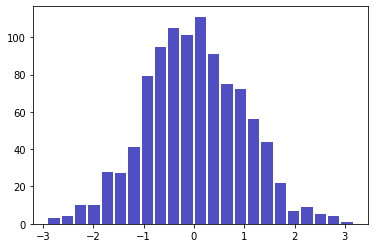

In [20]:
plt.hist(x=test_statistics, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

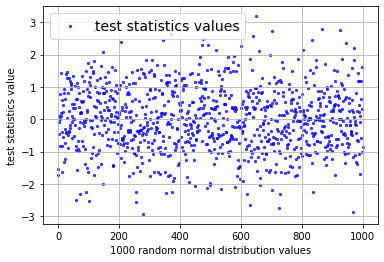

In [21]:
import matplotlib.pyplot as plt

#Make a plot of these statistics.

plt.scatter(x_for_plot, test_statistics, c = 'blue', s = 5, alpha = 0.7, label = 'test statistics values')
plt.grid()
plt.legend(fontsize = 14)
plt.rcParams['figure.figsize'] = (10.0, 7.0)

plt.xlabel('1000 random normal distribution values')
plt.ylabel('test statistics value')
plt.show()

## Q 3.2) Write the mathematical formula of the statistics 


##  Q 3.3) Take the maximum value of these test statistics in absolute value

In [22]:
abs_t = abs(np.array(test_statistics))
max_t = abs_t.max()
print("So, the maximum value of test statistics is:",  max_t)

So, the maximum value of test statistics is: 3.1764106191579673


##  Q 3.3)  Calculate p-value.

Since $P-value = 2(1-P[Z\leq|Z_{\beta}|])$, we have:

In [23]:
p_value = 2*(1-norm.cdf(max_t))
print('P-value is: ', p_value)

P-value is:  0.0014910973022814744


Conclusion: 
If a beta value of 0 means the dependent variables are uncorrelated with the apple returns.

Since the p-value is smaller then 0.05, the Null Hypothesis (Beta = 0) at a significant level of 95% should be rejected.